<a href="https://colab.research.google.com/github/brettfazio/AI-Homework/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

Here I will implement the function `get_random_data(w,b,mu,sigma,m)` that generates data for logistic regression with two features $ x_1 $ and $ x_2

In [0]:
import numpy as np

In [0]:
def get_random_data(w, b, mu, sigma, m):

  # n is noise, chosen according to mean (mu) and std.dev. (sigma)
  n = np.random.normal(mu, sigma, m)

  x_1 = np.random.rand(m)

  # c is the class, 0 has 50% probabiltiy, 1 has 50% probability
  c = np.random.randint(2, size=m)
  x_2 = w * x_1 + b + (-1)**c * n

  variables = np.column_stack([x_1, x_2])

  return (variables, c)

Below uses the `get_random_data` function to generate a random set of data to plot.

In [0]:
m = 6000
partial = (int) (m * 0.8)

data, labels = get_random_data(5,5,1,1,m)

print(data.shape)
print(labels.shape)

(6000, 2)
(6000,)


Implementation of `display_random_data(labels, data)` that takes the output of `get_random_data` and plots it.

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

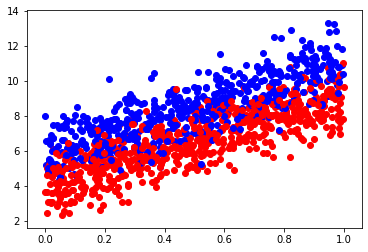

In [0]:
# Plot a subset of the points
def display_random_data(labels, data, show):
  display_amount = (int) (m * 0.2)
  labels_subset = labels[:display_amount]
  data_subset = data[:display_amount]
  for cc, point in zip(labels_subset,data_subset):
    plt.scatter(point[0], point[1], color= ('red' if cc==1 else 'blue') )
  if show:
    plt.show()

display_random_data(labels, data, 1)

Split the data into training and validation

In [0]:
train = data[:partial]
label_train = labels[:partial]

validate = data[partial:]
label_validate = labels[partial:]

# Problem 2

Implementing logistic regression with keras

In [0]:
# Set up imports
%tensorflow_version 2.x
import tensorflow as tf

Referencing function from the provided in class notes [here](https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR).

In [0]:
def build_and_compile_model():
  # build model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))
  # compile model
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.003),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

Create the model and train it

In [0]:
my_model = build_and_compile_model()

num_epochs = 200

history = my_model.fit(train,
                    label_train,
                    epochs=num_epochs,
                    batch_size=512,
                    validation_data=(validate, label_validate))

Train on 4800 samples, validate on 1200 samples
Epoch 1/200
4800/4800 [==============================] - 1s 137us/sample - loss: 1.2303 - accuracy: 0.4819 - val_loss: 1.1919 - val_accuracy: 0.4667
Epoch 2/200
4800/4800 [==============================] - 0s 6us/sample - loss: 1.1001 - accuracy: 0.4819 - val_loss: 1.0819 - val_accuracy: 0.4667
Epoch 3/200
4800/4800 [==============================] - 0s 6us/sample - loss: 1.0050 - accuracy: 0.4819 - val_loss: 0.9916 - val_accuracy: 0.4667
Epoch 4/200
4800/4800 [==============================] - 0s 6us/sample - loss: 0.9249 - accuracy: 0.4819 - val_loss: 0.9118 - val_accuracy: 0.4667
Epoch 5/200
4800/4800 [==============================] - 0s 5us/sample - loss: 0.8555 - accuracy: 0.4819 - val_loss: 0.8441 - val_accuracy: 0.4667
Epoch 6/200
4800/4800 [==============================] - 0s 5us/sample - loss: 0.7977 - accuracy: 0.4821 - val_loss: 0.7871 - val_accuracy: 0.4683
Epoch 7/200
4800/4800 [==============================] - 0s 5us/samp

Using code from provided notebook [here](https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/imdb_movie_reviews_classification_dense_layers.ipynb) to graph out my model.

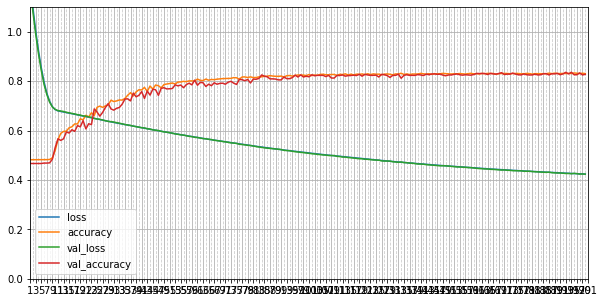

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1.1) 
plt.gca().set_xlim(0, num_epochs)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

Graph the line that I trained the data on and the separating line that my model determined.

Used [this](https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38) article to help extract the line from the model.

[]

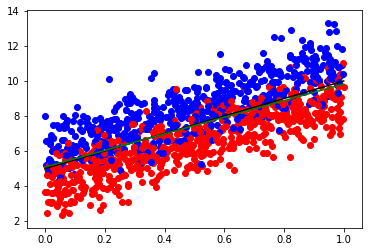

In [0]:
# Actual line
x_actual = np.linspace(0.0, 1.0, 100)
y_actual = x_actual * 5 + 5

plt.plot(x_actual, y_actual, color='black')

# Extraction of model's line
x_new = np.linspace(0.0, 1.0, 100)
weights = my_model.layers[0].get_weights()

bias = weights[1][0]
x_1_weight = weights[0][0]
x_2_weight = weights[0][1]

y_new = (-(bias / x_2_weight) / (bias / x_1_weight)) * x_new + (-bias / x_2_weight)

plt.plot(x_new, y_new, color='green')
display_random_data(labels, data, 0)
plt.plot()

Heatmap visualization of my model using inspiration from [here](https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/).

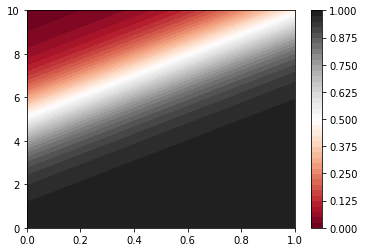

In [0]:
x_lin = np.linspace(0,1,500)
y_lin = np.linspace(0,10,500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin,y_lin)

z = my_model.predict(np.c_[X.ravel(), Y.ravel()])

z = z.reshape(X.shape)

plt.xlim([0,1])
plt.ylim([0,10])

plt.contourf(X,Y,z, 40, cmap='RdGy')
plt.colorbar()
plt.show()

# Problem 3

Implementing logistic regression with numpy

Set up constants

In [0]:
num_epochs = 200
lr = 0.001

Set up sigmoid function $ 1 / {(1 + e^{-z})} $

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-1*z))

Binary cross entropy for evaluation

In [0]:
def binary_cross_entropy(y, a):
  return -y * np.log10(a) - (1-y) * np.log10(1-a)

Computing loss function

In [0]:
def compute_loss(A, B):
  loss = 0
  for data_val, label in zip(A, B):
    pred = np.dot(np.reshape(manual_weights, (2,)), data_val) + manual_bias
    bce = binary_cross_entropy(label, sigmoid(pred))
    loss += bce
  loss /= (partial)
  return loss

Perform logistic logression for the set number of epochs

In [0]:
manual_weights = np.random.rand(2)
manual_bias = np.zeros(1)

for epoch in np.arange(num_epochs):
  for i in np.arange(partial):
    y_pred = np.dot(manual_weights,train[i]) + manual_bias #size of (1,)
    inner = sigmoid(y_pred)-label_train[i]
    gradient_weight_0 = inner*train[i][0]
    gradient_weight_1 = inner*train[i][1]
    gradient_b = inner

    manual_weights[0] -= lr * gradient_weight_0
    manual_weights[1] -= lr * gradient_weight_1
    manual_bias -= lr * gradient_b

print(manual_weights)
print(manual_bias)

[ 8.34776185 -1.68439603]
[8.52795832]


# Compute the loss and the accuracy

In [0]:
print(compute_loss(validate, label_validate))

[0.04059314]


Computing accuracy - go through each of the test labels and compare the predicted value with the expected value

In [0]:
accuracy = 0
for data_val, label in zip(validate, label_validate):
  y_prediction = np.dot(np.reshape(manual_weights, (2,)), data_val) + manual_bias
  label_prediction = 1 if sigmoid(y_prediction) > 0.5 else 0
  accuracy += 1 if label_prediction == label else 0

print(accuracy / (m-partial))

0.8316666666666667


Plot the estimated line

[]

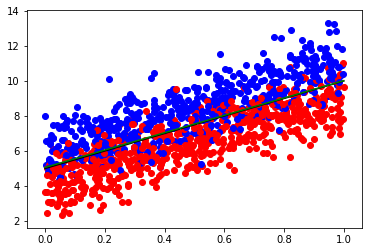

In [0]:
# Actual line
x_actual = np.linspace(0.0, 1.0, 100)
y_actual = x_actual * 5 + 5

plt.plot(x_actual, y_actual, color='black')

# Extraction of model's line
x_new = np.linspace(0.0, 1.0, 100)

bias = manual_bias[0]
x_1_weight = manual_weights[0]
x_2_weight = manual_weights[1]

y_new = (-(bias / x_2_weight) / (bias / x_1_weight)) * x_new + (-bias / x_2_weight)

plt.plot(x_new, y_new, color='green')
display_random_data(labels, data, 0)
plt.plot()

Heatmap for the manual logistic regression

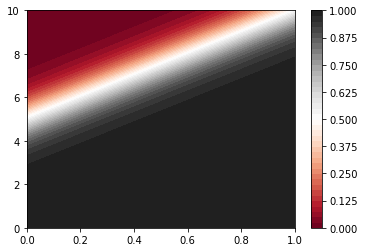

In [0]:
x_lin = np.linspace(0,1,500)
y_lin = np.linspace(0,10,500)

fig = plt.figure()

X, Y = np.meshgrid(x_lin,y_lin)

# use the weights and bias to compute the color on the heatmap
z = sigmoid(X.ravel() * manual_weights[0] + Y.ravel() * manual_weights[1] + manual_bias[0])
z = z.reshape(X.shape)

plt.xlim([0,1])
plt.ylim([0,10])

plt.contourf(X,Y,z, 40, cmap='RdGy')
plt.colorbar()
plt.show()